In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats
import statistics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, make_scorer
import seaborn as sns

import os
from scipy.stats import skew, probplot, norm
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, Lasso, ElasticNet 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

In [2]:
train = pd.read_csv('/Users/Muyan/Desktop/ML_Project/train.csv')
test = pd.read_csv('/Users/Muyan/Desktop/ML_Project/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize']= [8.0, 4.0]

In [7]:
# categorical features
categorical_feat1 = train.columns[train.dtypes=='object'].tolist()

# numerical features
numeric_feat1 = train.columns[(train.dtypes=='int64')|(train.dtypes=='float64')].drop('SalePrice').tolist()

print('categorical features:\n{}\n{}'.format(sorted(categorical_feat1), len(categorical_feat1)))
print('\nnumerical features:\n{}\n{}'.format(sorted(numeric_feat1), len(numeric_feat1)))

categorical features:
['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']
43

numerical features:
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'Overall

In [8]:
def check_missingness(df):
    missing_features = df.columns[df.isna().any()]

    # how bad is the missing ?
    missing = {}
    for i in missing_features:
        missing[i]= df[i].isna().sum()
    missing = pd.Series(missing).sort_values(ascending=False)
    return missing

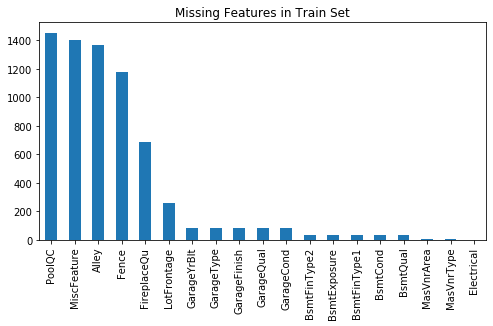

In [9]:
check_missingness(train)[:20].plot(kind='bar')
plt.title('Missing Features in Train Set')
plt.savefig('train_missing.png',bbox_inches='tight')

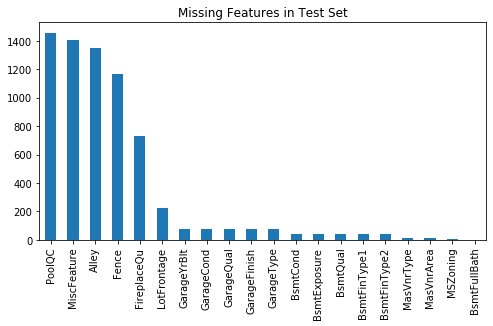

In [10]:
check_missingness(test)[:20].plot(kind='bar')
plt.title('Missing Features in Test Set')

plt.savefig('test_missing.png',bbox_inches='tight')

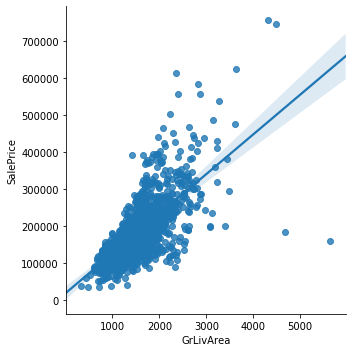

In [11]:
sns.lmplot(x='GrLivArea', y= 'SalePrice', data=train)
plt.savefig('saleprice_grlivarea.png',bbox_inches='tight')

(-0.5, 9.5, 0, 800000)

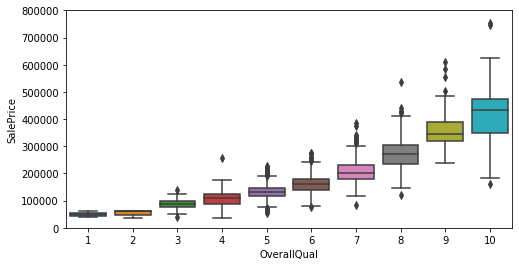

In [12]:
sns.boxplot(train.OverallQual, train.SalePrice)
plt.axis(ymin=0, ymax=800000)

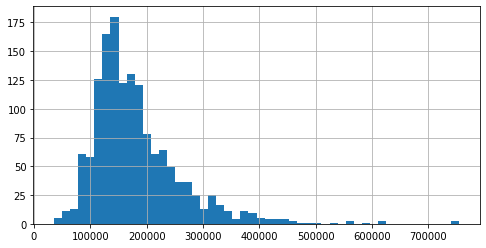

In [13]:
train.SalePrice.hist(bins=50)
plt.savefig('saleprice.png',bbox_inches='tight')

In [14]:
# Correlation

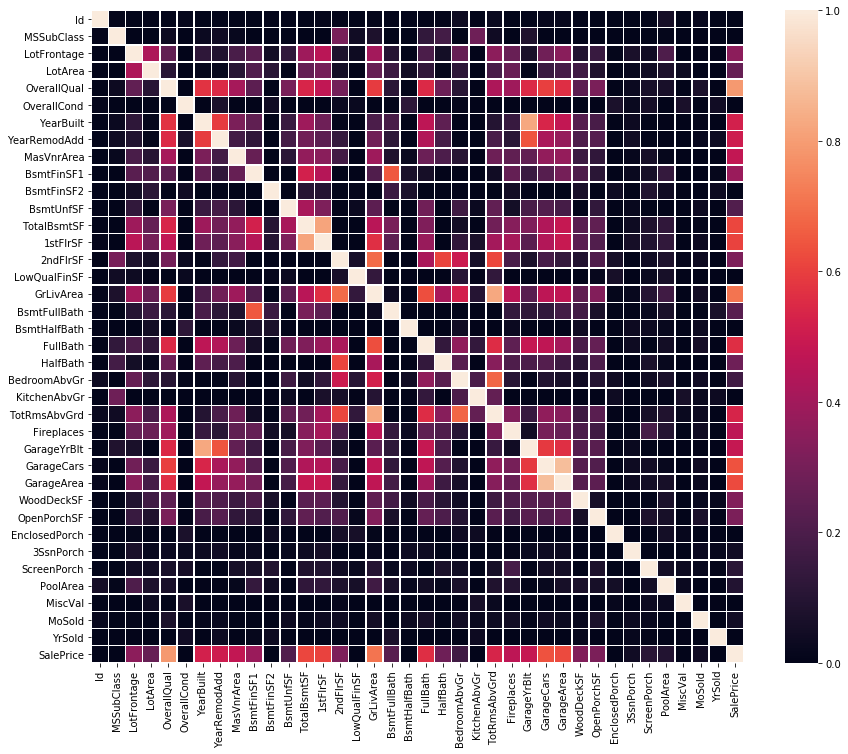

In [15]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat,linewidths=.5,vmin=0, vmax=1, square=True)

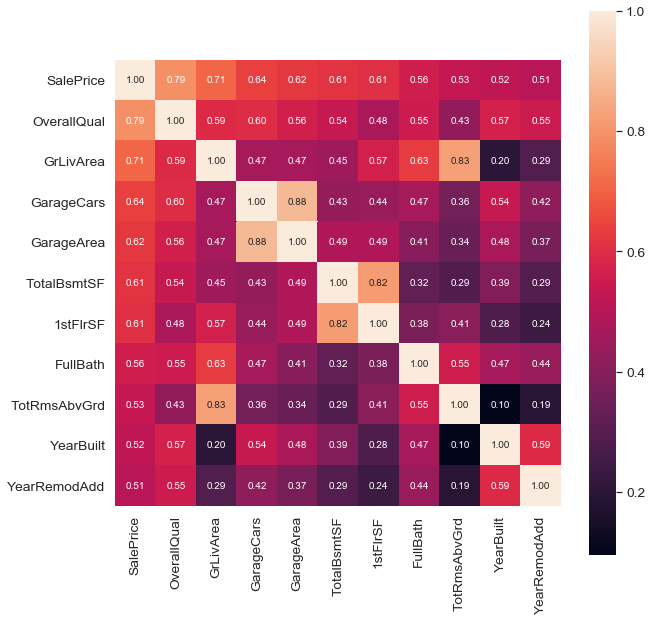

In [16]:
plt.figure(figsize=(10,10))
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [17]:
# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(train[cols], height = 2.5)
# plt.show()

# Data Processing

In [18]:
def process_missing(df):
   
    # fill LotFrontage missings with median value in the same neighborhood
    df['LotFrontage'] = df[['Neighborhood','LotFrontage']].groupby('Neighborhood').transform(lambda x: x.fillna(x.median()))

    # impute MSZoning missings as the most frequent value in the same MSSubClass
    df['MSZoning'] = df[['MSSubClass', 'MSZoning']].groupby('MSSubClass').transform(lambda x: x.fillna(x.mode()[0]))

    df['Utilities'] =df['Utilities'].fillna(df['Utilities'].mode()[0])

    df['Exterior1st'] = df['Exterior1st'].fillna('Wd Sdng')
    df['Exterior2nd'] = df['Exterior2nd'].fillna('Wd Sdng')

    df['Electrical']=df.groupby('Neighborhood')['Electrical'].transform(lambda x: x.fillna(x.mode()[0]))

    df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
    df['KitchenQual'] = df.groupby('Neighborhood')['KitchenQual'].transform(lambda x: x.mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    df[numeric_feat1] = df[numeric_feat1].fillna(0)
    df[categorical_feat1] = df[categorical_feat1].fillna('None')

    #print(df.head())
    return df

In [19]:
all_data = pd.concat([train.copy().drop(columns=['SalePrice']), test.copy()], axis=0)

In [20]:
all_data = process_missing(all_data)

In [21]:
all_data.isnull().any().sum()

0

In [22]:
# Feature Engineering

In [23]:
def Feat_engineering1(data):
    df = data.copy()
    # drop 'Id', 'Street', 'Utilities','PoolQC'
    to_remove=set(['Id', 'Street', 'Utilities','PoolQC', 'PoolArea', 'HalfBath', 'BsmtHalfBath', 'FullBath', 'BsmtFullBath',\
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF','TotalBsmtSF', '1stFlrSF',\
                  '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd'])
    # convert PoolArea to binary
    df['HasPool'] = df['PoolArea'].apply(lambda x: 'Yes' if x>0 else 'No')

    # convert to categorical
    df[['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageCars']] = df[['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageCars']].astype(str)

    # combine features of 'HalfBath', 'BsmtHalfBath', 'FullBath', 'BsmtFullBath'
    df['TotalBath'] = df['HalfBath']/2 + df['BsmtHalfBath']/2 + df['FullBath'] + df['BsmtFullBath']
    df['TotalBath'] = df['TotalBath'].astype('str')

    # combine features of 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'WoodDeckSF'
    df['Total_PorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['WoodDeckSF']

    # combine features of TotalSF = TotalBsmtSF + X1stFlrSF + X2ndFlrSF
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # combine features of 'BsmtFinSF1', 'BsmtFinSF2', 'X1stFlrSF', 'X2ndFlrSF'
    df['TotalFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']

    # combine 'YearBuilt', 'YearRemodAdd'
    df['YearBuildRemod'] = df['YearBuilt'] + df['YearRemodAdd']

    # add new features
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 'Yes' if x>0 else 'No')

    df['Has2ndFlr'] = df['2ndFlrSF'].apply(lambda x: 'Yes' if x>0 else 'No')

    df['HasBasement'] = df['TotalBsmtSF'].apply(lambda x: 'Yes' if x>0 else 'No')

    new_columns = list(set(df.columns).difference(to_remove))
    

    return df[new_columns]

In [24]:
def Feat_engineering(data):
    df = data.copy()
    
     # convert to categorical
    to_categorical = ['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 
                      'GarageCars', 'HalfBath','BsmtHalfBath',
                      'FullBath','BsmtFullBath','Fireplaces']
    
    df[to_categorical] = df[to_categorical].astype(str)

    # drop features
    to_remove=set(['Id', 'Street', 'Utilities','PoolQC'])
    new_columns = list(set(df.columns).difference(to_remove))
    
    return df[new_columns]

In [25]:
all_data = Feat_engineering(all_data)

In [26]:
categorical_feat = all_data.columns[all_data.dtypes=='object']
numeric_feat = all_data.columns[all_data.dtypes!='object']

In [27]:
print(len(categorical_feat))
print(len(numeric_feat))

49
27


# Skew Transform

In [28]:
def skew_transform(data):
    df = data.copy()
    skew_features = df.apply(lambda x: skew(x)).sort_values(ascending=False)

    high_skew = skew_features[skew_features > 0.75]
    skew_index = high_skew.index
    print(skew_index)

    df[skew_index] = df[skew_index].apply(lambda x: boxcox1p(x, boxcox_normmax(x+1)))
    return df

In [29]:
all_data[numeric_feat] = skew_transform(all_data[numeric_feat])

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'MasVnrArea',
       'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', '1stFlrSF', 'BsmtFinSF1',
       'MSSubClass', 'GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF'],
      dtype='object')


In [30]:
# Normalize Sale Price
salePrice = np.log(train.SalePrice)

In [31]:
plt.rcParams['figure.figsize']= [10.0, 4.0]

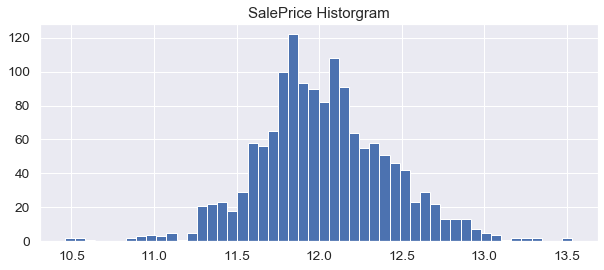

In [32]:
salePrice.hist(bins=50)
plt.title('SalePrice Historgram')
plt.savefig('saleprice_log.png',bbox_inches='tight')

In [33]:
numeric_feat

Index(['GrLivArea', 'BsmtUnfSF', 'YearBuilt', 'MSSubClass', 'PoolArea',
       '2ndFlrSF', 'ScreenPorch', 'BsmtFinSF2', 'OpenPorchSF', 'LotFrontage',
       'WoodDeckSF', 'YrSold', 'YearRemodAdd', 'GarageArea', 'MasVnrArea',
       'GarageYrBlt', 'EnclosedPorch', 'LowQualFinSF', 'OverallQual',
       'MiscVal', 'OverallCond', 'BsmtFinSF1', '3SsnPorch', 'MoSold',
       '1stFlrSF', 'TotalBsmtSF', 'LotArea'],
      dtype='object')

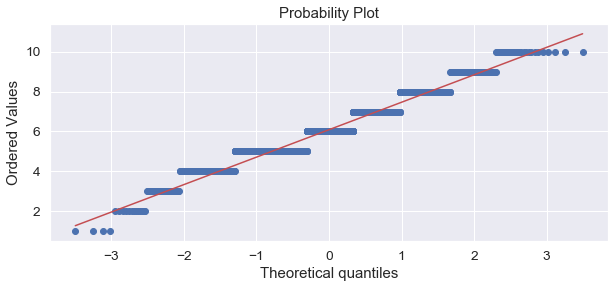

In [34]:
probplot(all_data['OverallQual'], plot=plt)
plt.savefig('overallqual transformed.png',bbox_inches='tight')

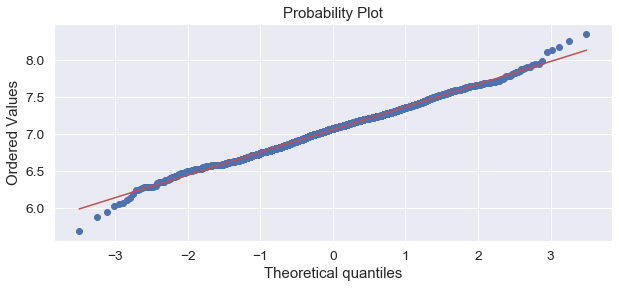

In [35]:
probplot(all_data['GrLivArea'], plot=plt)
plt.savefig('GrLivArea transform.png',bbox_inches='tight')

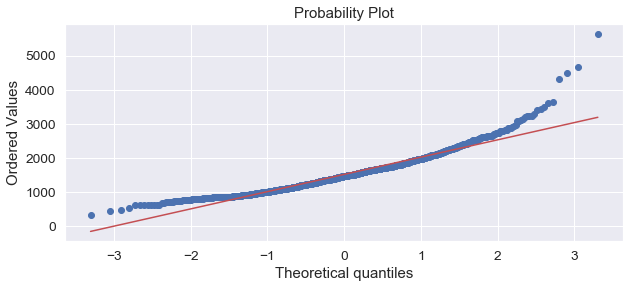

In [36]:
probplot(train['GrLivArea'], plot=plt)
plt.savefig('GrLivArea before.png',bbox_inches='tight')

In [37]:
# remove outliers

In [38]:
from scipy.stats import zscore
z_score = {}
for i in numeric_feat:
    z_score[i] = zscore(all_data[i])
z_score = pd.DataFrame(z_score)
z_score = z_score.head(train.shape[0])
for i in ['OverallQual','GrLivArea']:
    print(i,z_score[np.abs(z_score[i])>3.5][i].sort_values(ascending=False))

OverallQual 533   -3.610024
375   -3.610024
Name: OverallQual, dtype: float64
GrLivArea 1298    4.218663
523     3.646113
1182    3.512723
1100   -3.640328
533    -4.481538
Name: GrLivArea, dtype: float64


In [39]:
# choose the highest z_score from two ends as outlier
# two outliers case
outliers = [1298, 533] 

# four outliers case
outliers = [1298, 533, 523, 1100]

In [40]:
to_drop = list(map(lambda x: x[0]+'_'+x[1],[(i, all_data[i].mode()[0]) for i in categorical_feat]))

In [41]:
cat_dummy = pd.get_dummies(all_data[categorical_feat]).drop(columns=to_drop)

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_label = all_data.copy()
for i in categorical_feat:
    data_label[i] = le.fit_transform(data_label[i])

In [43]:
data_dummy = pd.concat([cat_dummy,all_data[numeric_feat]], axis=1)

In [44]:
X = data_dummy.head(train.shape[0])
X.drop(outliers, inplace=True)
y = salePrice.copy()
y.drop(outliers, inplace=True)

In [45]:
X_le=data_label.head(train.shape[0])
X_le.drop(outliers, inplace=True)

In [46]:
X.shape

(1456, 287)

In [47]:
X_le.shape

(1456, 76)

In [48]:
def get_error(X_train,y_train,X_test,y_test, model, show = True, refit = True):
    if refit: model.fit(X_train, y_train)
    train_error = 1 - r2_score(y_train, model.predict(X_train))
    test_error = 1 - r2_score(y_test,model.predict(X_test))
    if show:
        print("train error ", train_error)
        print("test error", test_error)
    return [train_error, test_error]

In [49]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=108)
train_idx = X_train.index
test_idx = X_test.index

In [50]:
plt.rcParams['figure.figsize']= [6.0, 5.0]

In [51]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

# Modeling

In [55]:
X_train = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/X_train.csv')
y_train = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/y_train.csv', index_col=0, names=['SalePrice'])
X_test = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/X_test.csv')
y_test = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/y_test.csv', index_col=0, names=['SalePrice'])

## Lasso

In [56]:
lasso = linear_model.Lasso(normalize = True)

lasso = lasso.set_params(random_state=50)

# Train the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=50, selection='cyclic',
      tol=0.0001, warm_start=False)

In [58]:
# Initial prediction
lasso_pred = lasso.predict(X_test)

# Print out MAE, MSE, and RMSE
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test).SalePrice)

print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 54879.59
Mean Squared Error (MSE): 0.15137326804831802
Root Mean Square Error (RMSE): 0.38906717678097447
Mean Absolute Percent Error (MAPE): 30.62 %.


#  Grid search Lasso

In [59]:
alphas = 100**np.linspace(10,-2,1000)*0.5

param_grid_lasso = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

In [60]:
grid_search_lasso = ms.GridSearchCV(lasso, param_grid_lasso, scoring= 'neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time grid_search_lasso.fit(X_train, y_train)

CPU times: user 12.5 s, sys: 605 ms, total: 13.1 s
Wall time: 1min 13s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=50,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([5.00000000e+19, 4.73092410e+19, 4.47632856e+19, 4.23543413e+19,
       4.007...
       1.14638466e-04, 1.08469176e-04, 1.02631888e-04, 9.71087341e-05,
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                         'max_iter': [5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [61]:
# get the best parameters
grid_search_lasso.best_params_

{'alpha': 0.00017845246728376112, 'max_iter': 20}

In [192]:
# Prediction using the tuned parameters
grid_lasso = grid_search_lasso.best_estimator_

In [63]:
print("The train set R^2 is: %.5f" % grid_lasso.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_lasso.score(X_test, y_test))

The train set R^2 is: 0.93112
The test set R^2 is is: 0.91784


In [65]:
# Train Data
grid_lasso_pred = grid_lasso.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(grid_lasso_pred) - np.expm1(y_train).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, grid_lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, grid_lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13368.87
Mean Squared Error (MSE): 0.010973720670031552
Root Mean Square Error (RMSE): 0.10475552811203594
Mean Absolute Percent Error (MAPE): 7.63 %.


In [67]:
# Test Data
grid_lasso_pred = grid_lasso.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_lasso_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 12772.59
Mean Squared Error (MSE): 0.012435031918428449
Root Mean Square Error (RMSE): 0.11151247427273976
Mean Absolute Percent Error (MAPE): 7.56 %.


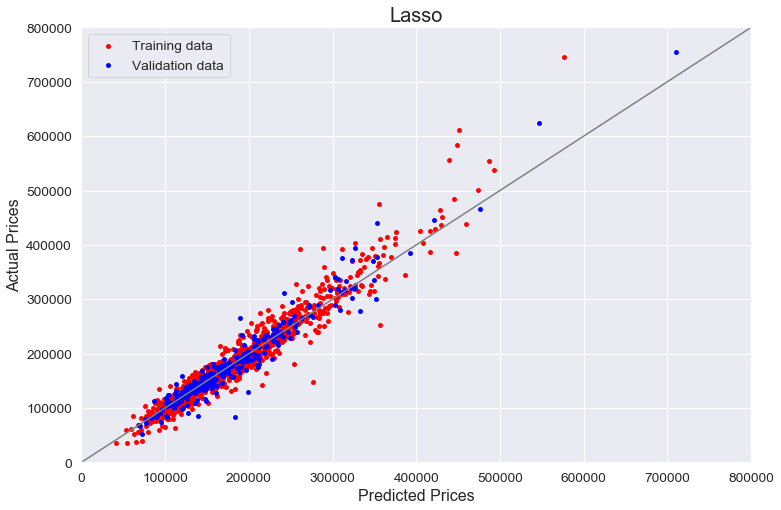

In [68]:
y_train_lasso = grid_lasso.predict(X_train)
y_test_lasso = grid_lasso.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_lasso), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_lasso), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("Lasso", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

## Ridge

In [69]:
X_train, X_test = X.loc[train_idx], X.loc[test_idx]

In [70]:
ridge = Ridge(alpha=7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=108, solver='auto', tol=0.001)
ridge.fit(X_train, y_train)
get_error(X_train,y_train,X_test,y_test,ridge, True,False)

train error  0.0549820494248765
test error 0.07644728142776935


[0.0549820494248765, 0.07644728142776935]

In [71]:
grid_para = dict(alpha = np.linspace(0,20,10))
ridge.set_params(random_state=108, tol=0.001)
grid_search_ridge = ms.GridSearchCV(ridge,  cv=5, param_grid=grid_para, n_jobs=-1, verbose=0)
%time grid_search_ridge.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
ridge=grid_search_ridge.best_estimator_
print(ridge)
get_error(X_train,y_train,X_test,y_test,ridge, True,False)

CPU times: user 200 ms, sys: 40.4 ms, total: 240 ms
Wall time: 640 ms
Ridge(alpha=6.666666666666667, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=108, solver='auto', tol=0.001)
train error  0.05469140208695833
test error 0.07650072177162515


[0.05469140208695833, 0.07650072177162515]

In [72]:
#Prediction with tuned hyperparameters
grid_ridge_pred = grid_search_ridge.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_ridge_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_ridge_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_ridge_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ SalePrice    12253.5
dtype: float64
Mean Squared Error (MSE): 0.011578369403183728
Root Mean Square Error (RMSE): 0.10760283176191845
Mean Absolute Percent Error (MAPE): SalePrice    7.43
dtype: float64 %.


## RandomSearch Ridge

In [73]:
alphas = 100**np.linspace(10,-2,1000)*0.5

param_grid_ridge = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

In [76]:
from sklearn.model_selection import RandomizedSearchCV

ridge = Ridge(alpha=7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=108, solver='auto', tol=0.001)

param_grid_ridge = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

random_search_ridge = RandomizedSearchCV(ridge, param_grid_ridge, n_iter=150, scoring= 'neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)
random_search_ridge.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=Ridge(alpha=7, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=108, solver='auto', tol=0.001),
                   iid='warn', n_iter=150, n_jobs=-1,
                   param_distributions={'alpha': array([5.00000000e+19, 4.73092410e+19, 4.47632856e+19, 4.23543413e+19,
       4.00750348e+19, 3.79183896e+19, 3.58...
       1.14638466e-04, 1.08469176e-04, 1.02631888e-04, 9.71087341e-05,
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                                        'max_iter': [5, 10, 20]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squ

In [80]:
random_search_ridge.best_params_

{'max_iter': 10, 'alpha': 4.2062485248680765}

In [81]:
# get the best parameters
random_search_ridge.best_params_

{'max_iter': 10, 'alpha': 4.2062485248680765}

In [201]:
random_ridge = random_search_ridge.best_estimator_

In [83]:
print("The train set R^2 is: %.5f" % random_search_ridge.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_search_ridge.score(X_test, y_test))

The train set R^2 is: -0.00832
The test set R^2 is is: -0.01170


In [84]:
#Prediction with tuned hyperparameters
random_ridge_pred = random_search_ridge.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_ridge_pred) - np.expm1(y_train))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_ridge_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_ridge_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ SalePrice    11453.75
dtype: float64
Mean Squared Error (MSE): 0.008324144779772684
Root Mean Square Error (RMSE): 0.09123675125612861
Mean Absolute Percent Error (MAPE): SalePrice    6.57
dtype: float64 %.


In [85]:
#Prediction with tuned hyperparameters
random_ridge_pred = random_search_ridge.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_ridge_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_ridge_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_ridge_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ SalePrice    12354.06
dtype: float64
Mean Squared Error (MSE): 0.011695025217179904
Root Mean Square Error (RMSE): 0.10814353987723864
Mean Absolute Percent Error (MAPE): SalePrice    7.52
dtype: float64 %.


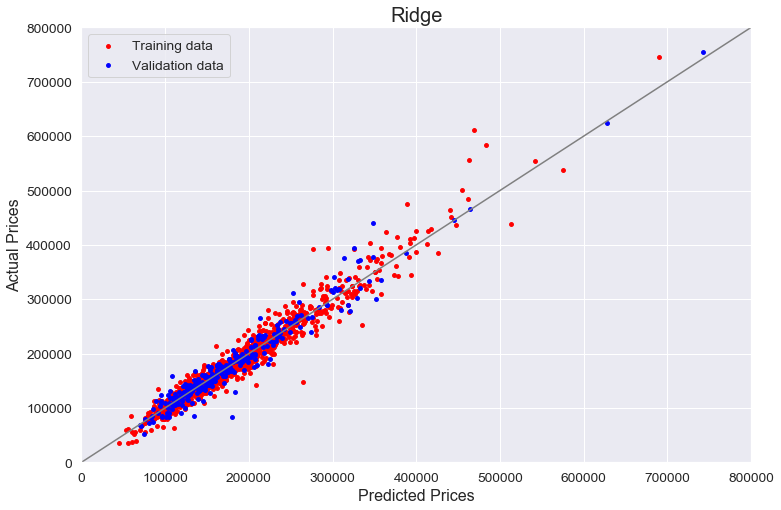

In [86]:
y_train_ridge = random_search_ridge.predict(X_train)
y_test_ridge = random_search_ridge.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_ridge), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_ridge), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("Ridge", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

## ElasticNet

In [87]:
eNet = linear_model.ElasticNet(normalize = True)

eNet.set_params(random_state=12)

# Train the model on training data
eNet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=12, selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
# Initial prediction
eNet_pred = eNet.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(eNet_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 54879.59
Mean Squared Error (MSE): 0.15137326804831802
Root Mean Square Error (RMSE): 0.38906717678097447
Mean Absolute Percent Error (MAPE): 30.62 %.


# Random Search ElasticNet

In [91]:
param_grid_eNet = {"max_iter": [5, 10, 20],
                    "alpha": 100**np.linspace(10,-2,1000)*0.5,
                    "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [92]:
combos = 1
for key in param_grid_eNet:
    combos *= len(param_grid_eNet[key])
    
combos

30000

In [93]:
eNet = linear_model.ElasticNet(normalize = True)

random_search_eNet = ms.RandomizedSearchCV(eNet, param_grid_eNet, n_iter=1000, scoring= 'neg_mean_squared_error', 
                                    n_jobs=-1, return_train_score = True)

%time random_search_eNet.fit(X_train, y_train)

CPU times: user 4.03 s, sys: 442 ms, total: 4.47 s
Wall time: 22.1 s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=True,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='warn', n_iter=1000, n_jobs=-1,
                   param_distributions={'alpha': array([5.00000000e+19, 4.7...
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                                        'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max

In [94]:
# get the best parameters
random_search_eNet.best_params_

{'max_iter': 20,
 'l1_ratio': 0.30000000000000004,
 'alpha': 0.0002935883195366631}

In [95]:
# Prediction using the tuned parameters
random_eNet = random_search_eNet.best_estimator_

In [96]:
print("The train set R^2 is: %.5f" % random_eNet.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_eNet.score(X_test, y_test))

The train set R^2 is: 0.93758
The test set R^2 is is: 0.91640


In [97]:
#Prediction with tuned hyperparameters
random_eNet_pred = random_eNet.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_eNet_pred) - np.expm1(y_train).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 12584.48
Mean Squared Error (MSE): 0.009944929831809593
Root Mean Square Error (RMSE): 0.09972426902118457
Mean Absolute Percent Error (MAPE): 7.13 %.


In [98]:
#Prediction with tuned hyperparameters
random_eNet_pred = random_eNet.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_ridge_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ SalePrice    12354.06
dtype: float64
Mean Squared Error (MSE): 0.012653371778731836
Root Mean Square Error (RMSE): 0.11248720717811353
Mean Absolute Percent Error (MAPE): SalePrice    7.52
dtype: float64 %.


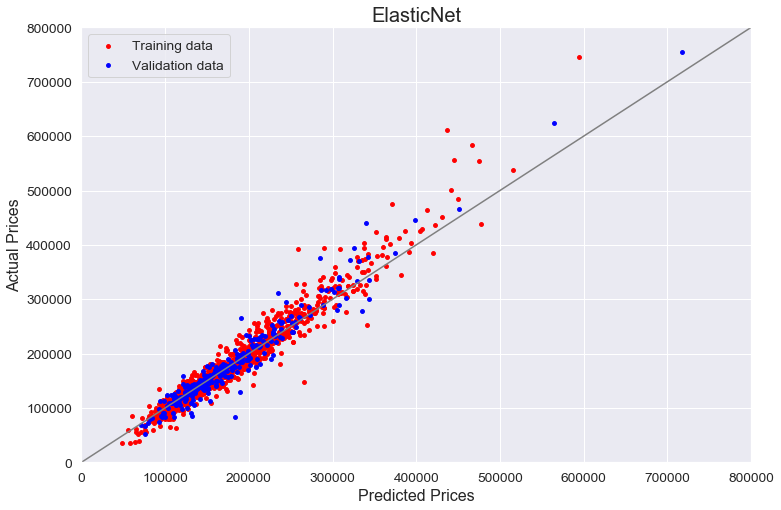

In [99]:
y_train_eNet = random_eNet.predict(X_train)
y_test_eNet = random_eNet.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_eNet), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_eNet), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("ElasticNet", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

## Random Forest

In [100]:
rforest = RandomForestRegressor()

rforest.set_params(random_state=52)

# Train the model on training data
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=52, verbose=0,
                      warm_start=False)

In [101]:
print("The train set R^2 is: %.5f" % rforest.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % rforest.score(X_test, y_test))

The train set R^2 is: 0.97521
The test set R^2 is is: 0.85913


In [102]:
# Initial prediction
rforest_pred = rforest.predict(X_test)

# Calculate the absolute errors
errors = np.abs(np.expm1(rforest_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test.SalePrice))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 18434.69
Mean Squared Error (MSE): 0.02132070457981208
Root Mean Square Error (RMSE): 0.14601611068581466
Mean Absolute Percent Error (MAPE): 10.32 %.


# Random Search Forest

In [103]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
param_grid ={'max_depth': [20, 25, 30],
             'max_features': ['auto','sqrt','log2'],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1, 3, 5],
             'n_estimators': [500, 750, 1000, 1250, 1500]}

In [105]:
combos = 1
for key in param_grid:
    combos *= len(param_grid[key])  
combos

405

In [106]:
random_search_rforest = RandomizedSearchCV(rforest, param_grid, n_iter=100, scoring='neg_mean_squared_error', 
                                      n_jobs=-1, return_train_score = True)

%time random_search_rforest.fit(X_train, y_train)

CPU times: user 20.5 s, sys: 536 ms, total: 21.1 s
Wall time: 10min 2s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_st...0

In [107]:
# get the best parameters
random_search_rforest.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [108]:
# Prediction using the tuned parameters
random_rforest = random_search_rforest.best_estimator_

In [109]:
print("The train set R^2 is: %.5f" % random_rforest.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_rforest.score(X_test, y_test))

The train set R^2 is: 0.98012
The test set R^2 is is: 0.87446


In [110]:
# Train Data
random_rforest_pred = random_rforest.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_rforest_pred) - np.expm1(y_train).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 6930.89
Mean Squared Error (MSE): 0.0031675115754199686
Root Mean Square Error (RMSE): 0.05628065009770204
Mean Absolute Percent Error (MAPE): 3.85 %.


In [111]:
#Prediction with tuned hyperparameters
random_rforest_pred = random_rforest.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_rforest_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 17289.76
Mean Squared Error (MSE): 0.019000978072187577
Root Mean Square Error (RMSE): 0.13784403531595982
Mean Absolute Percent Error (MAPE): 9.74 %.


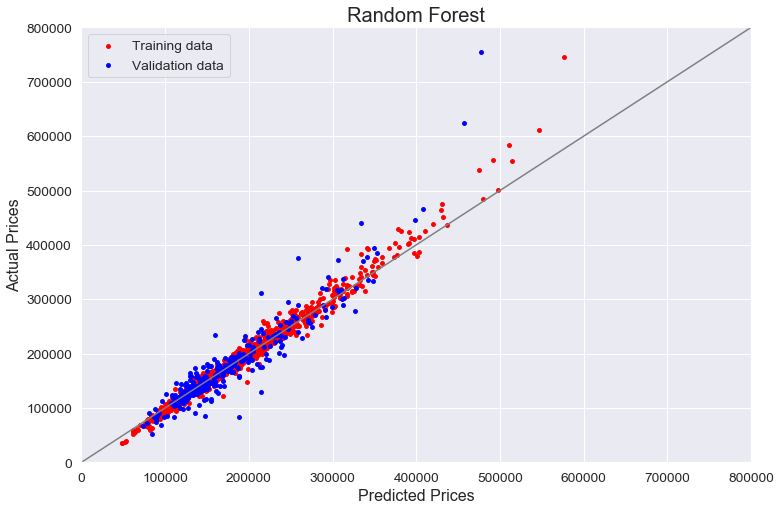

In [112]:
y_train_rForest = random_rforest.predict(X_train)
y_test_rForest = random_rforest.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_rForest), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_rForest), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("Random Forest", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

## Gradient Boosting

In [113]:
gbm = GradientBoostingRegressor()

gbm.set_params(random_state=42)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [114]:
# Train model on training data
gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [115]:
print("The train set R^2 is: %.5f" % gbm.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % gbm.score(X_test, y_test))

The train set R^2 is: 0.96158
The test set R^2 is is: 0.89904


In [116]:
# Initial prediction
gbm_pred = gbm.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(gbm_pred) - np.expm1(y_test.SalePrice))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, gbm_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, gbm_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14931.86
Mean Squared Error (MSE): 0.015280375527774748
Root Mean Square Error (RMSE): 0.1236138160877446
Mean Absolute Percent Error (MAPE): 8.62 %.


# Random Search GBM

In [117]:
gbm_param_grid={'n_estimators':[300, 400, 500, 600],
                'learning_rate':[0.05, 0.1, 1.5],
                'max_depth':[1, 2, 3],
                'min_samples_leaf':[1, 2, 3, 4]}

In [118]:
combos = 1
for key in gbm_param_grid:
    combos *= len(gbm_param_grid[key])  
combos

144

In [119]:
random_search_gbm = RandomizedSearchCV(gbm, gbm_param_grid, n_iter=50, scoring='neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time  random_search_gbm.fit(X_train, y_train)

CPU times: user 2.08 s, sys: 183 ms, total: 2.26 s
Wall time: 1min 49s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                       

In [120]:
# get the best parameters
random_search_gbm.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 2,
 'max_depth': 2,
 'learning_rate': 0.1}

In [121]:
random_gbm = random_search_gbm.best_estimator_

In [126]:
print("The train set R^2 is: %.5f" % random_gbm.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_gbm.score(X_test, y_test))

The train set R^2 is: 0.96194
The test set R^2 is is: 0.91021


In [134]:
# Train Data
random_gbm_pred = random_gbm.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_gbm_pred) - np.expm1(y_train).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_gbm_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_gbm_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 10049.87
Mean Squared Error (MSE): 0.0060635180298333905
Root Mean Square Error (RMSE): 0.07786859463116944
Mean Absolute Percent Error (MAPE): 5.8 %.


In [135]:
# Test Data
random_gbm_pred = random_gbm.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_gbm_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_gbm_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_gbm_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14311.21
Mean Squared Error (MSE): 0.013589351712157293
Root Mean Square Error (RMSE): 0.116573374799554
Mean Absolute Percent Error (MAPE): 8.07 %.


In [136]:
gbm_param_grid1={'n_estimators':[1000, 2000, 3000],
                'learning_rate':[0.01, 0.05, 0.1],
                'max_depth':[2, 3, 4],
                'min_samples_leaf':[5, 10, 15],
                'min_samples_split': [5, 10],
                'loss':['huber']}

In [137]:
combos = 1
for key in gbm_param_grid:
    combos *= len(gbm_param_grid[key])  
combos

144

In [139]:
random_search_gbm1 = RandomizedSearchCV(gbm, gbm_param_grid1, n_iter=30, scoring='neg_mean_squared_error', 
                                      n_jobs=-1, return_train_score = True)

%time  random_search_gbm1.fit(X_train, y_train)

CPU times: user 6.34 s, sys: 221 ms, total: 6.56 s
Wall time: 6min 56s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                       

In [141]:
# get the best parameters
random_search_gbm1.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 2,
 'loss': 'huber',
 'learning_rate': 0.05}

In [142]:
random_gbm1 = random_search_gbm1.best_estimator_

In [143]:
print("The train set R^2 is: %.5f" % random_gbm.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_gbm.score(X_test, y_test))

The train set R^2 is: 0.96194
The test set R^2 is is: 0.91021


In [144]:
# Train data
random_gbm_pred1 = random_gbm1.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_gbm_pred1) - np.expm1(y_train).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_gbm_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_gbm_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 8261.13
Mean Squared Error (MSE): 0.005659310107135998
Root Mean Square Error (RMSE): 0.07522838631218935
Mean Absolute Percent Error (MAPE): 4.97 %.


In [145]:
# Test Data
random_gbm_pred1 = random_gbm1.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_gbm_pred1) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_gbm_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_gbm_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13912.0
Mean Squared Error (MSE): 0.013448475265925824
Root Mean Square Error (RMSE): 0.11596756126575149
Mean Absolute Percent Error (MAPE): 7.97 %.


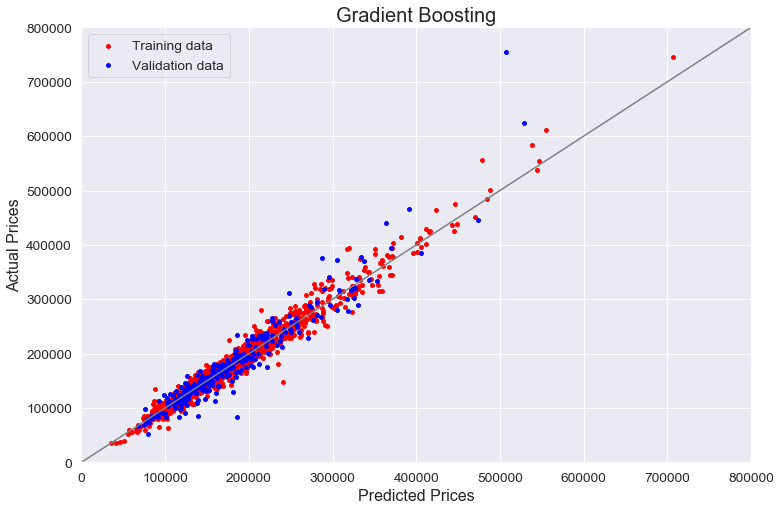

In [147]:
y_train_gradientboost = random_gbm.predict(X_train)
y_test_gradientboost = random_gbm.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_gradientboost), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_gradientboost), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("Gradient Boosting", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

## XGBoost

In [148]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

xgb.set_params(random_state=22)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=22,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [149]:
xgb.fit(X_train, y_train)

[16:35:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=22,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [150]:
print("The train set R^2 is: %.5f" % xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % xgb.score(X_test, y_test))

The train set R^2 is: 0.95440
The test set R^2 is is: 0.89179


In [151]:
# Initial prediction
xgb_pred = xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(xgb_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 15918.85
Mean Squared Error (MSE): 0.01637818696398001
Root Mean Square Error (RMSE): 0.12797729081356587
Mean Absolute Percent Error (MAPE): 9.08 %.


# Random Search XGBoost

In [152]:
xgb_param_grid ={'learning_rate': [0.01, 0.05, 0.1],
                 'max_depth': [2, 3, 4, 5, 6],
                 'min_child_weight': [4, 5, 6],
                 'n_estimators': [400, 450, 500, 550, 600]}

random_search_xgb = RandomizedSearchCV(xgb, xgb_param_grid, scoring='neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time random_search_xgb.fit(X_train, y_train)

[16:37:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 8.22 s, sys: 163 ms, total: 8.38 s
Wall time: 1min 44s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          rand...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [153]:
# get the best parameters
random_search_xgb.best_params_

{'n_estimators': 450,
 'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.05}

In [154]:
random_xgb = random_search_xgb.best_estimator_

In [155]:
print("The train set R^2 is: %.5f" % random_xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_xgb.score(X_test, y_test))

The train set R^2 is: 0.97328
The test set R^2 is is: 0.90468


In [156]:
# Train Data
random_xgb_pred = random_xgb.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_xgb_pred) - np.expm1(y_train).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 8319.12
Mean Squared Error (MSE): 0.00425759893600647
Root Mean Square Error (RMSE): 0.06525027920251736
Mean Absolute Percent Error (MAPE): 4.77 %.


In [157]:
#Prediction with tuned hyperparameters
random_xgb_pred = random_xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_xgb_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14175.45
Mean Squared Error (MSE): 0.01442686378441331
Root Mean Square Error (RMSE): 0.12011188028006768
Mean Absolute Percent Error (MAPE): 8.22 %.


In [158]:
xgb_param_grid1 ={'learning_rate': [0.01],
                 'max_depth': [3],
                 'min_child_weight': [0],
                 'n_estimators': [3460],
                 'subsample': [0.7],
                 'colsample_bytree' : [0.7],
                 'objective':['reg:linear'],
                 'nthread':[-1],
                 'scale_pos_weight':[1],
                 'seed':[27],
                 'reg_alpha': [0.00006]}

random_search_xgb = RandomizedSearchCV(xgb, xgb_param_grid, scoring='neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time random_search_xgb.fit(X_train, y_train)                 

[16:41:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 8.96 s, sys: 105 ms, total: 9.06 s
Wall time: 1min 49s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          rand...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [161]:
# get the best parameters
random_search_xgb.best_params_

{'n_estimators': 600,
 'min_child_weight': 4,
 'max_depth': 2,
 'learning_rate': 0.1}

In [162]:
random_xgb1 = random_search_xgb.best_estimator_

In [163]:
print("The train set R^2 is: %.5f" % random_xgb1.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_xgb1.score(X_test, y_test))

The train set R^2 is: 0.97523
The test set R^2 is is: 0.91191


In [166]:
# Train Data
random_xgb_pred1 = random_xgb1.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_xgb_pred1) - np.expm1(y_train).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_xgb_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_xgb_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 8036.6
Mean Squared Error (MSE): 0.0039459034790691235
Root Mean Square Error (RMSE): 0.06281642682506801
Mean Absolute Percent Error (MAPE): 4.61 %.


In [170]:
# Test Data
random_xgb_pred1 = random_xgb1.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_xgb_pred1) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_xgb_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_xgb_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14158.68
Mean Squared Error (MSE): 0.013332216751734339
Root Mean Square Error (RMSE): 0.11546521879654643
Mean Absolute Percent Error (MAPE): 8.02 %.


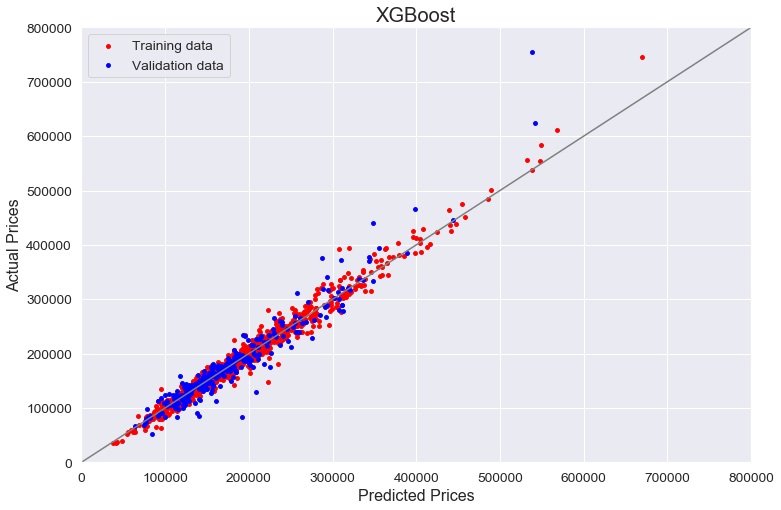

In [172]:
y_train_xgboost = random_xgb.predict(X_train)
y_test_xgboost = random_xgb.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_xgboost), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_xgboost), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("XGBoost", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [ ]:
# Stacking

In [183]:
from mlxtend.regressor import StackingCVRegressor

In [202]:
stack = StackingCVRegressor(regressors=(grid_lasso, random_ridge, random_eNet, random_rforest,
                                        random_gbm, random_xgb),
                                meta_regressor=random_xgb, shuffle = True,
                                random_state = 100,
                                use_features_in_secondary=True)

In [203]:
%time stack.fit(X_train,y_train)

[19:08:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2min 28s, sys: 956 ms, total: 2min 29s
Wall time: 2min 31s


StackingCVRegressor(cv=5,
                    meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1, gamma=0,
                                                importance_type='gain',
                                                learning_rate=0.05,
                                                max_delta_step=0, max_depth=3,
                                                min_child_weight=5,
                                                missing=None, n_estimators=450,
                                                n_jobs=1, nthread=None,
                                                objective='reg:linear',
                                                random_state=22, reg_alpha=0,
                                         

In [216]:
print("The train set R^2 is: %.5f" % stack.score(np.array(X_train), np.array(y_train)))
print("The test set R^2 is is: %.5f" % stack.score(np.array(X_test), np.array(y_test)))

The train set R^2 is: 0.97672
The test set R^2 is is: 0.91384


In [218]:
# Initial prediction
stack_pred = stack.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(stack_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, stack_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, stack_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13644.19
Mean Squared Error (MSE): 0.013040102528283137
Root Mean Square Error (RMSE): 0.11419326831421867
Mean Absolute Percent Error (MAPE): 7.68 %.


## Meta-model ElasticNet with rforest

In [221]:
stack1 = StackingCVRegressor(regressors=(grid_lasso, random_ridge, random_eNet, random_rforest,
                                        random_gbm, random_xgb),
                                meta_regressor=random_eNet, shuffle = True,
                                random_state = 11,
                                use_features_in_secondary=True)

In [222]:
%time stack1.fit(np.array(X_train), np.array(y_train))

[19:25:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2min 16s, sys: 656 ms, total: 2min 17s
Wall time: 2min 17s


StackingCVRegressor(cv=5,
                    meta_regressor=ElasticNet(alpha=0.0002935883195366631,
                                              copy_X=True, fit_intercept=True,
                                              l1_ratio=0.30000000000000004,
                                              max_iter=20, normalize=True,
                                              positive=False, precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=11,
                    refit=True,
                    regressors=(Lasso(alpha...
                                             importance_type='gain',
                                             learning_rate=0.05,
                                             max_delta_step=0, max_depth=3,
                 

In [223]:
print("The train set R^2 is: %.5f" % stack1.score(np.array(X_train), np.array(y_train)))
print("The test set R^2 is is: %.5f" % stack1.score(np.array(X_test), np.array(y_test)))

The train set R^2 is: 0.94581
The test set R^2 is is: 0.92151


In [225]:
# Initial prediction
stack1_pred = stack1.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(stack1_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, stack1_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, stack1_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 12290.38
Mean Squared Error (MSE): 0.011879688935193847
Root Mean Square Error (RMSE): 0.10899398577533463
Mean Absolute Percent Error (MAPE): 7.42 %.


## Meta-model ElasticNet w/o rforest

In [227]:
stack1 = StackingCVRegressor(regressors=(grid_lasso, random_ridge, random_eNet, random_rforest,
                                        random_gbm, random_xgb),
                                meta_regressor=random_eNet, shuffle = True,
                                random_state = 11,
                                use_features_in_secondary=True)

In [228]:
%time stack1.fit(np.array(X_train), np.array(y_train))

[19:34:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2min 22s, sys: 1.21 s, total: 2min 23s
Wall time: 2min 25s


StackingCVRegressor(cv=5,
                    meta_regressor=ElasticNet(alpha=0.0002935883195366631,
                                              copy_X=True, fit_intercept=True,
                                              l1_ratio=0.30000000000000004,
                                              max_iter=20, normalize=True,
                                              positive=False, precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=11,
                    refit=True,
                    regressors=(Lasso(alpha...
                                             importance_type='gain',
                                             learning_rate=0.05,
                                             max_delta_step=0, max_depth=3,
                 

In [229]:
print("The train set R^2 is: %.5f" % stack1.score(np.array(X_train), np.array(y_train)))
print("The test set R^2 is is: %.5f" % stack1.score(np.array(X_test), np.array(y_test)))

The train set R^2 is: 0.94581
The test set R^2 is is: 0.92151


In [231]:
# Initial prediction
stack1_pred = stack1.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(stack1_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, stack1_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, stack1_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 12290.38
Mean Squared Error (MSE): 0.011879688935193847
Root Mean Square Error (RMSE): 0.10899398577533463
Mean Absolute Percent Error (MAPE): 7.42 %.


## Meta-model ElasticNet w/o rforest

In [234]:
stack2 = StackingCVRegressor(regressors=(grid_lasso, random_ridge, random_eNet, random_gbm1, random_xgb1),
                                meta_regressor=random_eNet, shuffle = True,
                                random_state = 11,
                                use_features_in_secondary=True)

In [235]:
%time stack2.fit(np.array(X_train), np.array(y_train))

[19:39:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1min 15s, sys: 781 ms, total: 1min 16s
Wall time: 1min 17s


StackingCVRegressor(cv=5,
                    meta_regressor=ElasticNet(alpha=0.0002935883195366631,
                                              copy_X=True, fit_intercept=True,
                                              l1_ratio=0.30000000000000004,
                                              max_iter=20, normalize=True,
                                              positive=False, precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=11,
                    refit=True,
                    regressors=(Lasso(alpha...
                                             importance_type='gain',
                                             learning_rate=0.1,
                                             max_delta_step=0, max_depth=2,
                  

In [236]:
print("The train set R^2 is: %.5f" % stack2.score(np.array(X_train), np.array(y_train)))
print("The test set R^2 is is: %.5f" % stack2.score(np.array(X_test), np.array(y_test)))

The train set R^2 is: 0.94457
The test set R^2 is is: 0.92171


In [238]:
# Initial prediction
stack2_pred = stack2.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(stack1_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, stack2_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, stack2_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 12290.38
Mean Squared Error (MSE): 0.011849888505011093
Root Mean Square Error (RMSE): 0.10885719317073674
Mean Absolute Percent Error (MAPE): 7.42 %.


In [243]:
stack1 = StackingCVRegressor(regressors=(grid_lasso, random_ridge, random_eNet,  
                                         random_gbm, random_xgb),
                            meta_regressor=random_xgb, 
                            random_state=91,
                            use_features_in_secondary=True)

params_stack1 = {'lasso__alpha': alphas,
                'lasso__max_iter': 20,
                'elasticnet__l1_ratio' :np.arange(0.0, 1.0, 0.1),
                'elasticnet__alpha': alphas,
                'gradientboostingregressor__n_estimators':[600, 650],
                'gradientboostingregressor__learning_rate':[0.01, 0.05, 0.1],
                'gradientboostingregressor__max_depth':[1, 2],
                'gradientboostingregressor__min_samples_leaf':[3, 4],
                'xgbregressor__learning_rate': [0.05, 0.075],
                'xgbregressor__max_depth': [4, 5, 6],
                'xgbregressor__n_estimators':[250, 500, 750]
                }
                
random_search_stack1 = RandomizedSearchCV(estimator=stack1, param_grid = params_stack1, 
                                  scoring = 'neg_mean_squared_error', return_train_score = True)

%time random_search_stack1.fit(np.array(X_train), np.array(y_train))

TypeError: __init__() got an unexpected keyword argument 'param_grid'

In [ ]:
def rmse_stacking(model):
    kf = KFold(n_splits = 5, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, np.array(X_train), y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## SalePrice Prediction

In [259]:
print(test.shape)
submissions = pd.DataFrame(index=test.index)
submissions['Id'] =test['Id']

(1459, 80)


In [260]:
data_dummy_test = data_dummy.tail(test.shape[0])
data_le_test = data_label.tail(test.shape[0])

In [264]:
print(submissions.shape, data_dummy_test.shape, data_le_test.shape)

(1459, 1) (1459, 287) (1459, 76)


In [265]:
# y prediction
for i in models.index:
    if models[i] in [ridge, lasso, eNet]:
        submissions[i] = models[i].predict(data_dummy_test)
    else:
        submissions[i] = models[i].predict(data_le_test)

In [266]:
submissions.iloc[:,1:] = submissions.iloc[:,1:].apply(lambda x: np.round(np.exp(x),1), axis=1)

submissions.head(10)

,Id,ridge,lasso,ElasticNet,random forest,gradient boost,xgboost
0,1461,124785.2,166992.3,166992.3,122660.4,126096.7,124610.3
1,1462,155621.7,166992.3,166992.3,155398.5,156321.2,158821.1
2,1463,188816.1,166992.3,166992.3,184610.1,184405.4,184465.3
3,1464,201240.0,166992.3,166992.3,174386.8,182705.8,183743.1
4,1465,194450.7,166992.3,166992.3,193826.2,189136.5,199507.0
5,1466,169987.3,166992.3,166992.3,190407.5,179941.0,173135.8
6,1467,175517.0,166992.3,166992.3,163769.3,175374.9,173640.1
7,1468,159286.2,166992.3,166992.3,175649.1,165405.9,161889.9
8,1469,190905.0,166992.3,166992.3,181139.5,184892.2,187677.8
9,1470,119555.3,166992.3,166992.3,126263.6,126750.0,124503.4
